In [1]:

import os
import numpy as np   
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import matplotlib.colors as mcolors 
import matplotlib.style as mstyle
import pandas as pandas
import cmocean
import datetime
import scipy as scipy
from scipy import stats,signal
import pandas
import xarray as xr              


print("done importing modules")


done importing modules


In [2]:
#%% Define file locations
WRF_DIRECTORY_26 = "/pl/active/JKL_IDEAL/hurricanes/newSims/sst_26_skipd01_skipCoLES_ndg/" # precursor/
WRF_DIRECTORY_28 = "/pl/active/JKL_IDEAL/hurricanes/newSims/sst_28_skipd01_skipCoLES_ndg/" # precursor/
WRF_DIRECTORY_30 = "/pl/active/JKL_IDEAL/hurricanes/newSims/sst_30_skipd01_skipCoLES_ndg/" # precursor/

WRF_DIRS = [WRF_DIRECTORY_26,WRF_DIRECTORY_28,WRF_DIRECTORY_30]

# Choose which domain to evaluate
domains = ['d01','d02']

# Whether or not to save figures
saveFig = 'False'

# Vertical level to get max wind speed
i_z_max = 0

dirFig = "/pl/active/JKL_IDEAL/hurricanes/Figures/newSims/GIF/"

# Height for wind animations
iz_save = 4 #500

In [3]:
# Choose one simulation and one domain
WRF_DIRECTORY = WRF_DIRS[2]
domain = domains[1]   
    
print(WRF_DIRECTORY)
print(domain)

/pl/active/JKL_IDEAL/hurricanes/newSims/sst_30_skipd01_skipCoLES_ndg/
d02


In [4]:
#%% Define times for analysis

# Find auxHist files for current domain within directory
entries = os.listdir(WRF_DIRECTORY)
ofInterest = []
for i in np.arange(len(entries)):
    # Check if domain matches
    if domain in entries[i]:
        # Check if it is an auxHist file
        if 'auxH' in entries[i]:
            ofInterest = np.append(ofInterest,i)
#             # Check if time matches
#             ds = xr.open_dataset(WRF_DIRECTORY+entries[i],decode_times=False)
#             time_temp = np.array(ds['Times'])
#             ds.close()
#             ttime = np.array(['2000-01-01T00:00:00'], dtype='datetime64')
#             a = str(time_temp)
#             ttime = np.datetime64(a[3:13] + str(' ')+ a[14:-2])
#             if (ttime<time_1) & (ttime>time_0):
#                 ofInterest = np.append(ofInterest,i)
#                 print(entries[i])
ofInterest = ofInterest.astype('int')
rndmFromInterest = np.random.choice(ofInterest)


# Extract and save data from each auxHist file
for i_f in np.arange(0,len(ofInterest),1):
    # Open file
    ds = xr.open_dataset(WRF_DIRECTORY+str(entries[ofInterest[i_f]]),decode_times=False)
    # Extract data
    u_temp = np.array(ds['U'])
    v_temp = np.array(ds['V'])
    w_temp = np.array(ds['W'])
    time_temp = np.array(ds['Times'])
    # De-stagger variables
    u_temp = 0.5*(u_temp[:,:,:,0:np.shape(u_temp)[3]-1]+u_temp[:,:,:,1:np.shape(u_temp)[3]])
    v_temp = 0.5*(v_temp[:,:,0:np.shape(v_temp)[2]-1,:]+v_temp[:,:,1:np.shape(v_temp)[2],:])
    w_temp = 0.5*(w_temp[:,0:np.shape(w_temp)[1]-1,:,:]+w_temp[:,1:np.shape(w_temp)[1],:,:])
    # Save variables
    if i_f==0:
        # Only keep data within heights of interest
        u_temp = u_temp[:,iz_save:iz_save+1,:,:]
        v_temp = v_temp[:,iz_save:iz_save+1,:,:]
        w_temp = w_temp[:,iz_save:iz_save+1,:,:]
        # Create new variables
        u = np.zeros_like(u_temp) + u_temp
        v = np.zeros_like(v_temp) + v_temp
        w = np.zeros_like(w_temp) + w_temp
        Time = []
        Time.append(time_temp)
        # Domain dimensions
        dx = ds.DX
        n_x = dx*np.arange(0,np.shape(u)[3])
        n_y = dx*np.arange(0,np.shape(u)[2])
        # Free-up memory
        ph = 0.0
        phb = 0.0
        height_stag = 0.0
    else:
        # Only keep data within heights of interest
        u_temp = u_temp[:,iz_save:iz_save+1,:,:]
        v_temp = v_temp[:,iz_save:iz_save+1,:,:]
        w_temp = w_temp[:,iz_save:iz_save+1,:,:]
        # Append data to saved variables
        u = np.append(u,u_temp,axis=0)
        v = np.append(v,v_temp,axis=0)
        w = np.append(w,w_temp,axis=0)
        Time.append(time_temp)
    # Free-up memory
    u_temp = 0.0
    v_temp = 0.0
    w_temp = 0.0
    uv_temp = 0.0
    # Close file
    ds.close()
    print('Done with %i out of %i' % (i_f+1,len(ofInterest)))
    
uv = (u**2 + v**2)**0.5
u = 0.0
v = 0.0

Done with 1 out of 102
Done with 2 out of 102
Done with 3 out of 102
Done with 4 out of 102
Done with 5 out of 102
Done with 6 out of 102
Done with 7 out of 102
Done with 8 out of 102
Done with 9 out of 102
Done with 10 out of 102
Done with 11 out of 102
Done with 12 out of 102
Done with 13 out of 102
Done with 14 out of 102
Done with 15 out of 102
Done with 16 out of 102
Done with 17 out of 102
Done with 18 out of 102
Done with 19 out of 102
Done with 20 out of 102
Done with 21 out of 102
Done with 22 out of 102
Done with 23 out of 102
Done with 24 out of 102
Done with 25 out of 102
Done with 26 out of 102
Done with 27 out of 102
Done with 28 out of 102
Done with 29 out of 102
Done with 30 out of 102
Done with 31 out of 102
Done with 32 out of 102
Done with 33 out of 102
Done with 34 out of 102
Done with 35 out of 102
Done with 36 out of 102
Done with 37 out of 102
Done with 38 out of 102
Done with 39 out of 102
Done with 40 out of 102
Done with 41 out of 102
Done with 42 out of 102
D

In [5]:
#%% Create time vector (after initialization) (ignore dates)
# Create large datetime64 array
ttime = np.arange('2000-01-01T00:00:00', '2000-01-02T00:00:00',np.shape(Time)[0], dtype='datetime64')
# Save actual times for simulation
for i_t in np.arange(0,np.shape(Time)[0]):
    a = str(Time[i_t])
    ttime[i_t] = np.datetime64(a[3:13] + str(' ')+ a[14:-2])
# Save portion of temp array that actually matters
ttime = ttime[0:np.shape(Time)[0]]

In [6]:
#%% Sort 3D fields by time
i_sort = np.argsort(ttime)
ttime = ttime[i_sort]
w = w[i_sort,:,:,:]
uv = uv[i_sort,:,:,:]

In [7]:
def ID(num,ll):
    strrr = str(num)
    if len(strrr)<ll:
        while len(strrr)<ll:
            strrr = '0' + strrr
    return strrr


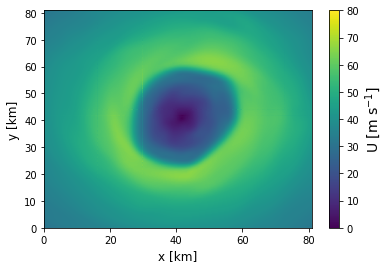

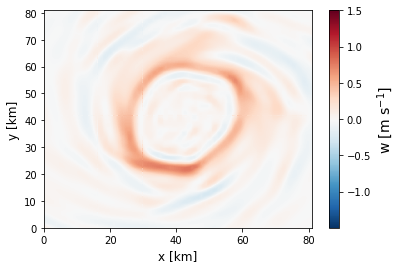

In [8]:
# Visualize winds at one time 

it = 0

plt.figure()
plt.pcolormesh(n_x/1000,n_y/1000,uv[it,0,:,:],vmin=0,vmax=80) 
plt.xlabel('x [km]',fontsize=12)
plt.ylabel('y [km]',fontsize=12)
cbar = plt.colorbar()
cbar.set_label(r"U [m s$^{-1}$]",fontsize=14)
plt.savefig(dirFig + "U_" + str(ID(it,3)) +".png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')
plt.show()
plt.close()  

maxx = 1.5*1.0004
minn = -1.5*0.9996
newCmap = cmocean.tools.crop(plt.cm.RdBu_r, minn, maxx, 0)
plt.figure()
plt.pcolormesh(n_x/1000,n_y/1000,w[it,0,:,:],vmin=minn,vmax=maxx,cmap=newCmap) 
plt.xlabel('x [km]',fontsize=12)
plt.ylabel('y [km]',fontsize=12)
cbar = plt.colorbar()
cbar.set_label(r"w [m s$^{-1}$]",fontsize=14)
plt.savefig(dirFig + "w_" + str(ID(it,3)) +".png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')
plt.show()
plt.close()  


In [9]:
#%% Make GIF
maxx = 1.5*1.0004
minn = -1.5*0.9996
newCmap = cmocean.tools.crop(plt.cm.RdBu_r, minn, maxx, 0)

for it in np.arange(len(ttime)):
    # Horizontal wind speed
    plt.figure()
    plt.pcolormesh(n_x/1000,n_y/1000,uv[it,0,:,:],vmin=0,vmax=80) 
    plt.xlabel('x [km]',fontsize=12)
    plt.ylabel('y [km]',fontsize=12)
    cbar = plt.colorbar()
    cbar.set_label(r"U [m s$^{-1}$]",fontsize=14)
    plt.savefig(dirFig + "U_" + str(ID(it,3)) +".png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')
    plt.close()  

    # Vertical wind speed
    plt.figure()
    plt.pcolormesh(n_x/1000,n_y/1000,w[it,0,:,:],vmin=minn,vmax=maxx,cmap=newCmap) 
    plt.xlabel('x [km]',fontsize=12)
    plt.ylabel('y [km]',fontsize=12)
    cbar = plt.colorbar()
    cbar.set_label(r"w [m s$^{-1}$]",fontsize=14)
    plt.savefig(dirFig + "w_" + str(ID(it,3)) +".png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')
    plt.close()  


In [10]:
np.shape(uv)

(102, 1, 1458, 1458)